# Digit Recognition
## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

%matplotlib inline

## Loading the Dataset

In [3]:
train_dataset = pd.read_csv('dataset/train.csv')
test_dataset = pd.read_csv('dataset/test.csv')
train_dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_dataset.shape

(42000, 785)

In [5]:
test_dataset.shape

(28000, 784)

In [43]:
X_train = train_dataset.drop(columns=['label'], axis=1)
y_train = train_dataset['label']
X_test = test_dataset

Text(0.5, 1.0, 'Number of digit classes')

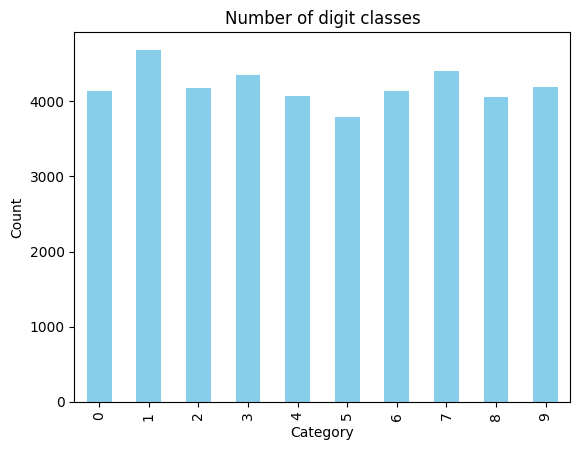

In [32]:
# visualize number of digits classes
counts=y_train.value_counts().sort_index()
counts.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of digit classes')

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

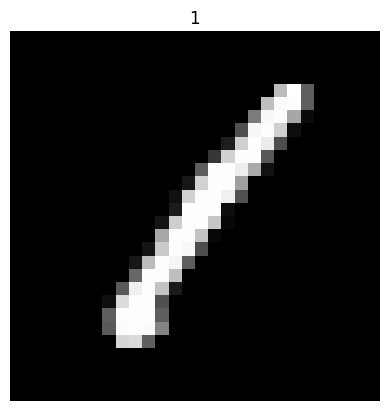

In [33]:
# plot some samples
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(y_train.iloc[0])
plt.axis('off')

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

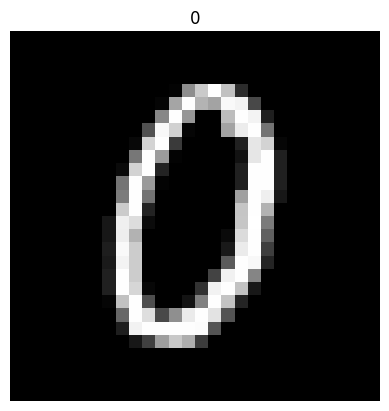

In [34]:
# plot some samples
img = X_train.iloc[5].to_numpy()
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(y_train.iloc[5])
plt.axis('off')

## Train Test Split

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
print("x_train shape",X_train.shape)
print("y_train shape",y_train.shape)
print("x_test shape",X_val.shape)
print("y_test shape",y_val.shape)

x_train shape (37800, 784)
y_train shape (37800,)
x_test shape (4200, 784)
y_test shape (4200,)


## Normalizating, Reshape and Encoding

In [45]:
# Normalize the data
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [46]:
# Reshape
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_val = X_val.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (37800, 28, 28, 1)
X_val shape: (4200, 28, 28, 1)
X_test shape: (28000, 28, 28, 1)


In [48]:
# One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.to_numpy().reshape(-1,1))
y_val = encoder.transform(y_val.to_numpy().reshape(-1,1))

In [ ]:
# Save One-Hot Encoder
# import pickle

# with open('one_hot_encoder.pkl', 'wb') as file:
#     pickle.dump(encoder, file)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

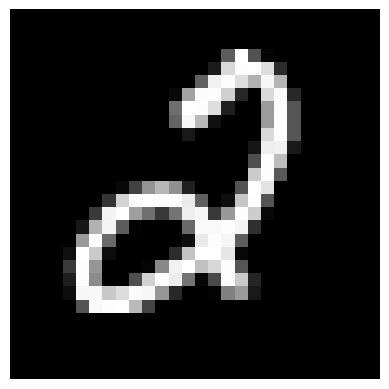

In [105]:
# Some examples
plt.imshow(X_train[3][:,:,0],cmap='gray')
plt.axis('off')

## Convolutional Neural Network 

In [58]:
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


model = Sequential()

model.add(Conv2D(filters=8, kernel_size = (5,5), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16, kernel_size = (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(258, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


c:\other\ml\digit-recognition\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Define Optimizer

In [56]:
adam = Adam(learning_rate=0.001)

In [59]:
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
epochs = 20
batch_size = 64

## Data Augmentation

In [61]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

datagen.fit(X_train)

## Fit the Model

In [67]:
earlystopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [68]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_val, y_val),
    steps_per_epoch=X_train.shape[0] // batch_size,
    callbacks=[earlystopping],
)

Epoch 1/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9105 - loss: 0.2841 - val_accuracy: 0.9781 - val_loss: 0.0809
Epoch 2/20
  1/590 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8750 - loss: 0.4187

c:\other\ml\digit-recognition\venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.8750 - loss: 0.4187 - val_accuracy: 0.9781 - val_loss: 0.0807
Epoch 3/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9314 - loss: 0.2253 - val_accuracy: 0.9807 - val_loss: 0.0686
Epoch 4/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.9688 - loss: 0.1996 - val_accuracy: 0.9812 - val_loss: 0.0685
Epoch 5/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9420 - loss: 0.1939 - val_accuracy: 0.9829 - val_loss: 0.0562
Epoch 6/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.8750 - loss: 0.4857 - val_accuracy: 0.9826 - val_loss: 0.0572
Epoch 7/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9466 - loss: 0.1747 - val_accuracy: 0.9814 - val_loss: 0.0607
Epoch 8/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.9219 - loss: 0.2300 - val_accuracy: 0.9810 - val_loss: 0.0612
Epoch 9/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9513 - loss: 0.1591 - val_accuracy: 0

## Evaluate the Model

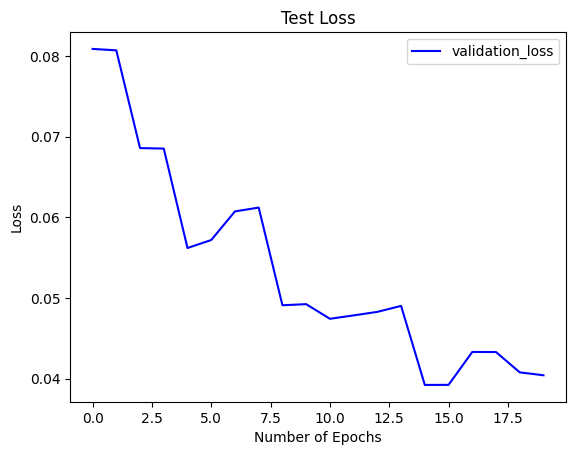

In [73]:
plt.plot(history.history['val_loss'], color='b', label='validation_loss')
plt.title('Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()

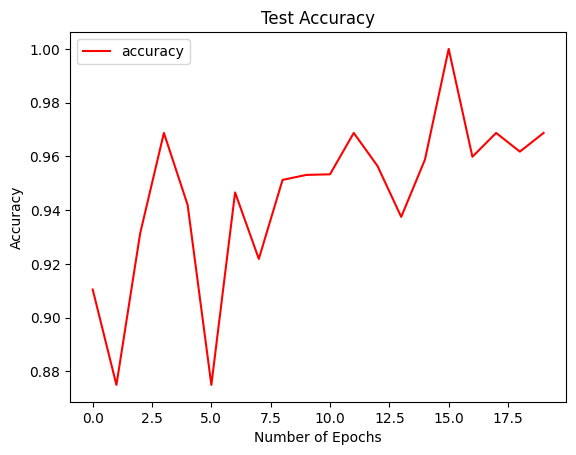

In [74]:
plt.plot(history.history['accuracy'], color='r', label='accuracy')
plt.title('Test Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


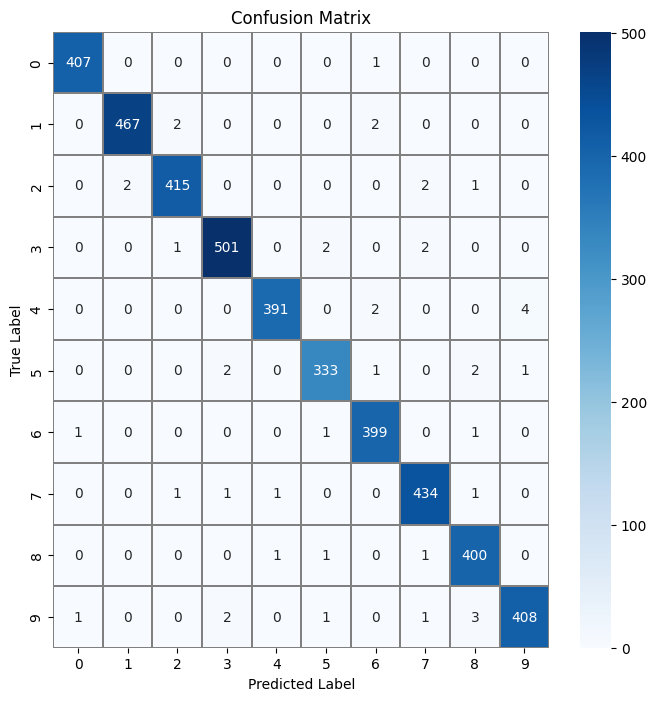

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = y_pred.argmax(axis=1)
y_val_classes = y_val.argmax(axis=1)
matrix = confusion_matrix(y_val_classes, y_pred_classes)
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(
    matrix,
    annot=True,
    linewidths=0.01,
    cmap="Blues",
    linecolor="gray",
    fmt=".0f",
    ax=ax,
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [108]:
model.save('digit_recognition_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

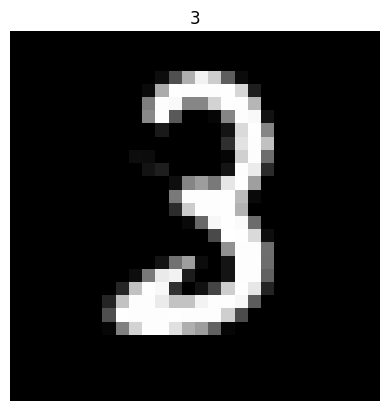

In [118]:
test_image = X_test[4]

plt.imshow(test_image[:,:,0],cmap='gray')
test_image = np.expand_dims(test_image, axis=0)

predicted_value = model.predict([test_image])
predicted_value = predicted_value.argmax(axis=1)

plt.title(predicted_value[0])
plt.axis('off')

In [117]:
X_test[4]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        